# Background Information

Here's the information provided on [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) about the dataset:

## Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content

#### Attributes
##### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

##### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

##### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

##### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Target
Need to perform clustering to summarize customer segments.

## Acknowledgement
The dataset for this project is provided by Dr. Omar Romero-Hernandez.

# EDA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

df = pd.read_csv('./marketing_campaign.csv', sep='\t')
df.head()

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
import re

# making column names lowercase and snake case for easier access
df.columns = df.columns.to_series().apply(lambda x: re.sub(r'([a-z])([A-Z])', r'\1_\2', x).lower())
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_prods', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'complain', 'z_cost_contact', 'z_revenue', 'response'],
      dtype='object')

In [ ]:
df.dtypes

id                         int64
year_birth                 int64
education                 object
marital_status            object
income                   float64
kidhome                    int64
teenhome                   int64
dt_customer               object
recency                    int64
mnt_wines                  int64
mnt_fruits                 int64
mnt_meat_products          int64
mnt_fish_products          int64
mnt_sweet_products         int64
mnt_gold_prods             int64
num_deals_purchases        int64
num_web_purchases          int64
num_catalog_purchases      int64
num_store_purchases        int64
num_web_visits_month       int64
accepted_cmp3              int64
accepted_cmp4              int64
accepted_cmp5              int64
accepted_cmp1              int64
accepted_cmp2              int64
complain                   int64
z_cost_contact             int64
z_revenue                  int64
response                   int64
dtype: object

We can see most variables are numeric, with only education, marital status, kidhome, teenhome, and complain being true categorical variables. `dt_customer` is a date column, and we shall transform it during the data cleansing phase. 

In [ ]:
df.isna().sum()

id                        0
year_birth                0
education                 0
marital_status            0
income                   24
kidhome                   0
teenhome                  0
dt_customer               0
recency                   0
mnt_wines                 0
mnt_fruits                0
mnt_meat_products         0
mnt_fish_products         0
mnt_sweet_products        0
mnt_gold_prods            0
num_deals_purchases       0
num_web_purchases         0
num_catalog_purchases     0
num_store_purchases       0
num_web_visits_month      0
accepted_cmp3             0
accepted_cmp4             0
accepted_cmp5             0
accepted_cmp1             0
accepted_cmp2             0
complain                  0
z_cost_contact            0
z_revenue                 0
response                  0
dtype: int64

In [ ]:
df.duplicated().sum()

0

## Understanding the dataset

### Shape and Quality

Overall, we can see that:
- the dataset has 2240 records and 29 attributes. 
- most variables are **numeric**, with only five truly **categorical** variables.
- the `income` variable has a few missing values, but they're very few (~1% of the records).
- there are no duplicate rows.

### Content of the Dataset

Viewed from a high level:
- Personal customer data, such as the year of birth, education, marital status, etc.
- Data about the consumption habits of each customer, like the amount money spent on fruit in the last two years, the number of purchases made through the web, etc.
- Data about the success of discount campaigns, measured through the number of purchases made with a discount on (what I assume is a) particular discount campaign and when the customer accepted the offer (in the 1st, on the 2nd, etc.)

Looking at the information we have about the data more closely, we can see that:
- the amount of money spent on the various products are integers; however, we do not know the scale that is being used. Is it measured in units? Hundreds? Thousands? We do not know.
- regarding the promotions, six of the seven attributes related to this are binary. `Response` could maybe be renamed to 'accepted_cmp_last' so that its meaning is clearer.
- in terms of the place of sale, each variables seems to have the appropriate data type (integers).

We don't have any information about z_cost_contract and z_cost_revenue.

### Pre-processing the dataset

- The `accepted_cmp_x` variables can be converted into a single variable, ranging from 0 to 6, where 0 is the value taken when the customer never accepted the offer, and the remaining are number of the campaign. This saves space and is more comprehensible.
- We have to deal with the missing values of the `income` variable. We can just drop the rows with missing values, since they comprise 1% of the dataset.
- We'll convert `dt_customer` to datetime.

In [ ]:
df.dt_customer = pd.to_datetime(df.dt_customer, dayfirst=True)

df.marital_status = df.marital_status.astype('category')
df.education = df.education.astype('category')
df.complain = df.complain.astype('category')

accepted_cmp_cols = ['accepted_cmp1', 'accepted_cmp2', 'accepted_cmp3','accepted_cmp4', 'accepted_cmp5', 'response']
df['accepted_cmp'] = df[accepted_cmp_cols].idxmax(axis=1).str.extract(r'(\d+)').fillna(0).astype(int)

df.dropna(inplace=True)
df.drop(accepted_cmp_cols, axis=1, inplace=True)

In [ ]:
df

id  year_birth   education marital_status   income  kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      teenhome dt_customer  recency  mnt_wines  mnt_fruits  mnt_meat_products  \
0            0  2012-09-04       58        635          88                546   
1            1  2014-03-08       38         11           1                  6   
2            0  2013-08-21       26        426          49                127   
3            0  2014-02-10       26         11           4                 20   
4            0  2014-01-19       94        173          43                118   
...        ...         ...      ...        ...         ...                ...   
2235         1  2013-06-13       46        709          43                182   
2236         1  2014-06-10       56        406           0                 30   
2237         0  2014-01-25       91        908          48                217   
2238         1  2014-01-24        8        428          30                214   
2239         1  2012-10-15       40         84           3                 61   

      mnt_fish_products  mnt_sweet_products  mnt_gold_prods  \
0                   172                  88              88   
1                     2                   1               6   
2                   111                  21              42   
3                    10                   3               5   
4                    46                  27              15   
...                 ...                 ...             ...   
2235                 42                 118             247   
2236                  0                   0               8   
2237                 32                  12              24   
2238                 80                  30              61   
2239                  2                   1              21   

      num_deals_purchases  num_web_purchases  num_catalog_purchases  \
0                       3                  8                     10   
1                       2                  1                      1   
2                       1                  8                      2   
3                       2                  2                      0   
4                       5                  5                      3   
...                   ...                ...                    ...   
2235                    2                  9                      3   
2236                    7                  8                      2   
2237                    1                  2                      3   
2238                    2                  6                      5   
2239                    3                  3                      1   

      num_store_purchases  num_web_visits_month complain  z_cost_contact  \
0                       4                     7        0               3   
1                       2                     5        0               3   
2                      10                     4        0               3   
3                       4                     6        0               3   
4                       6                     5        0               3   
...                   ...                   ...      ...             ...   
2235                    4    

Let's visualise the data we have, now.

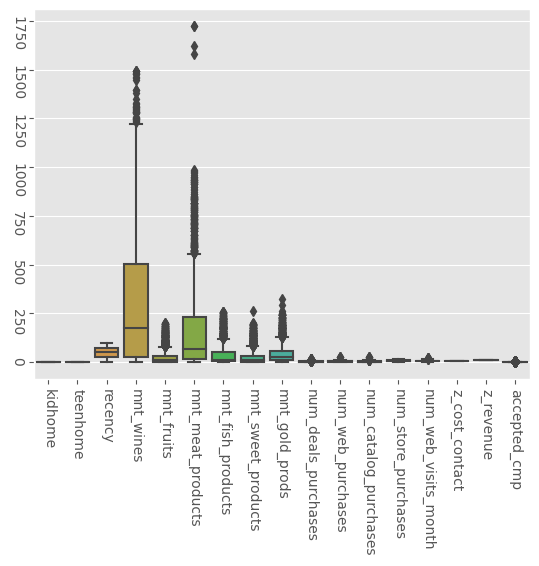

In [ ]:
ax = sns.boxplot(data=df.drop(['id', 'income', 'year_birth'], axis=1))
ax.tick_params(rotation=-90)

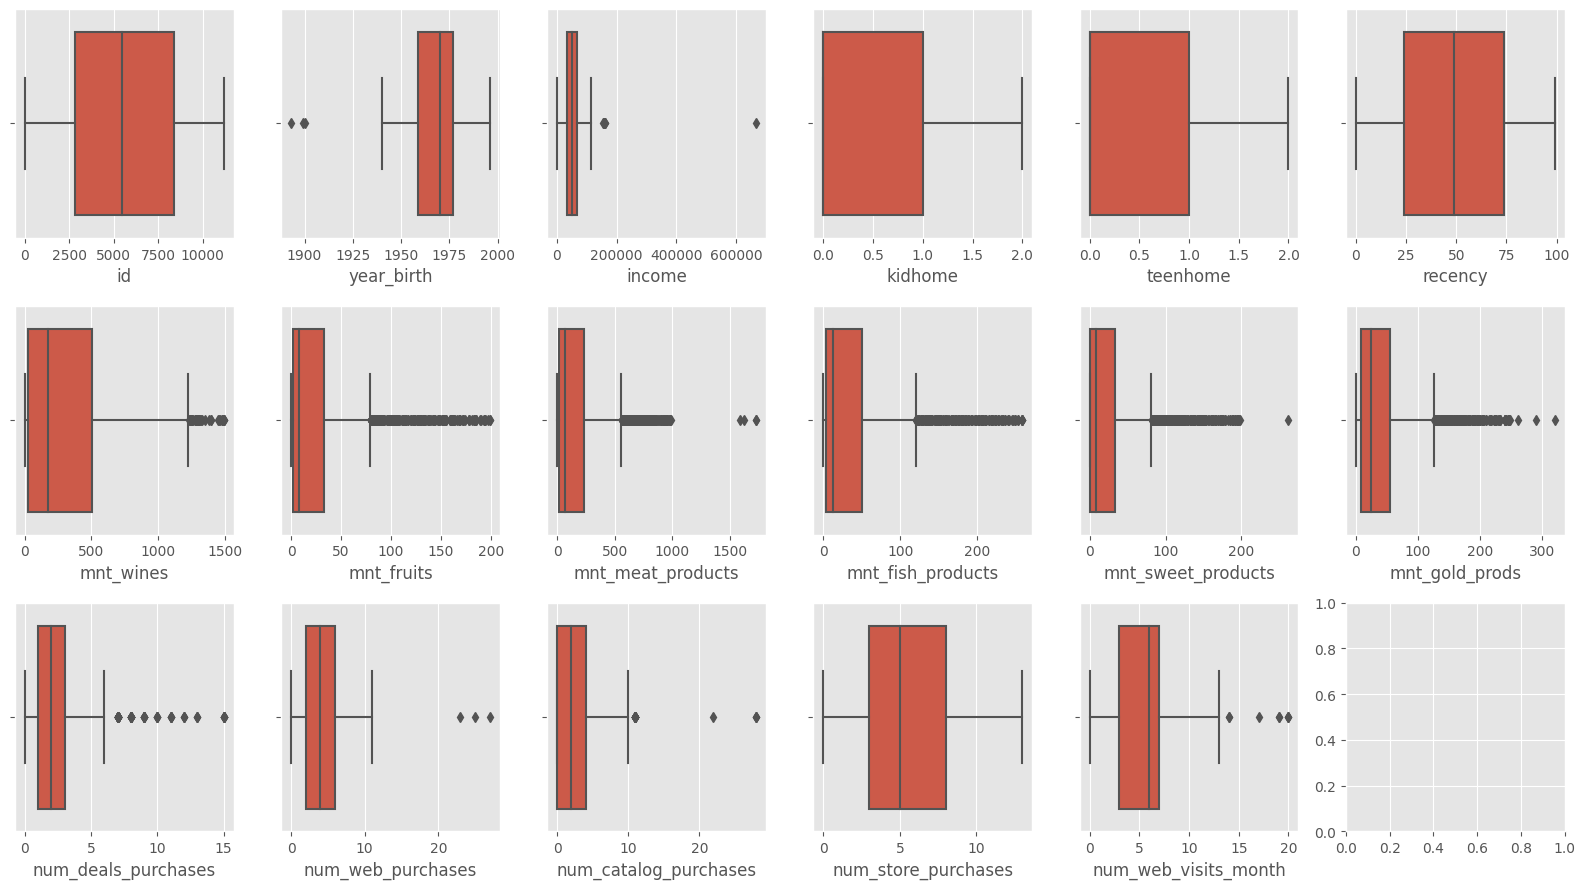

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(16, 9))
ax = ax.flatten()
num_cols = df.select_dtypes(include=np.number)

for i in range(len(ax) - 1):
    sns.boxplot(data=num_cols, x=num_cols.columns[i], ax=ax[i])

plt.tight_layout()

From the plots above, we can see that `z_revenue` and `z_cost_contact` only take a single value; they are, therefore, useless for any kind of prediction. `complain` also takes the same value, but has an outlier. Nonetheless, it also seems to be useless to keep it.

Most boxplots of the `mnt` attributes show a lot of datapoints as possible outliers. Most of these points, however, are too close to each other to be true outliers. They should, therefore, not be treated as such.

`income` and `year_birth` seem to be the only attributes that have noise. We should get rid of that datapoint later on.

In [ ]:
df.drop(['z_revenue', 'z_cost_contact'], axis=1, inplace=True)

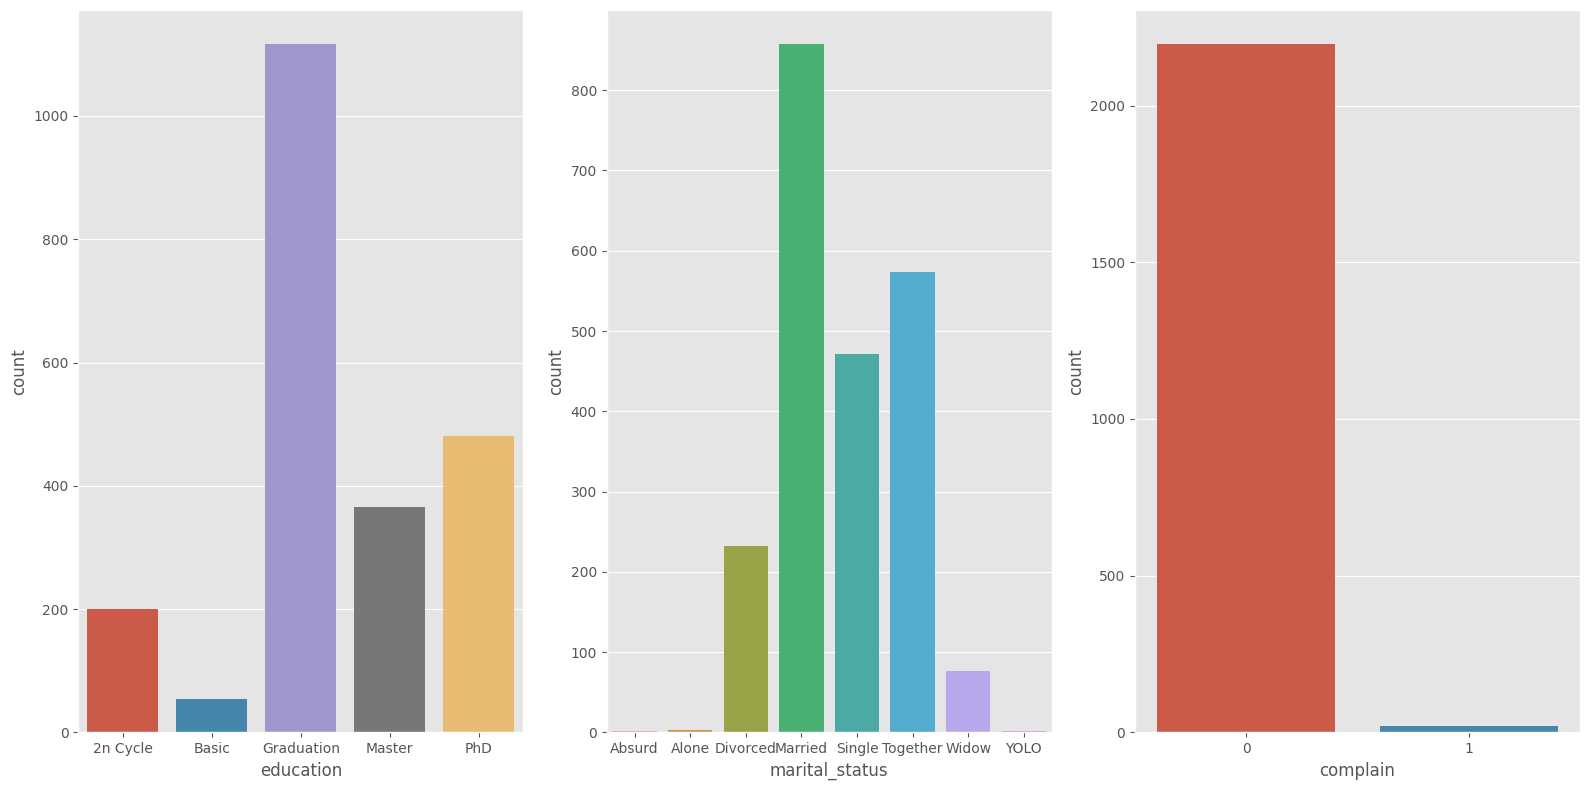

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
ax = ax.flatten()

_ = sns.countplot(data=df, x='education', ax=ax[0])
_ = sns.countplot(data=df, x='marital_status', ax=ax[1])
_ = sns.countplot(data=df, x='complain', ax=ax[2])

plt.tight_layout()

Here, we can see that `complain` is also basically useless, since little to no records have value 1. 

`education` and `martical_status` require some feature engineering. `education` can get only four values: basic, graduation, Master, and PhD. `martical_status`'s absurd, alone and YOLO categories can be grouped into "single".

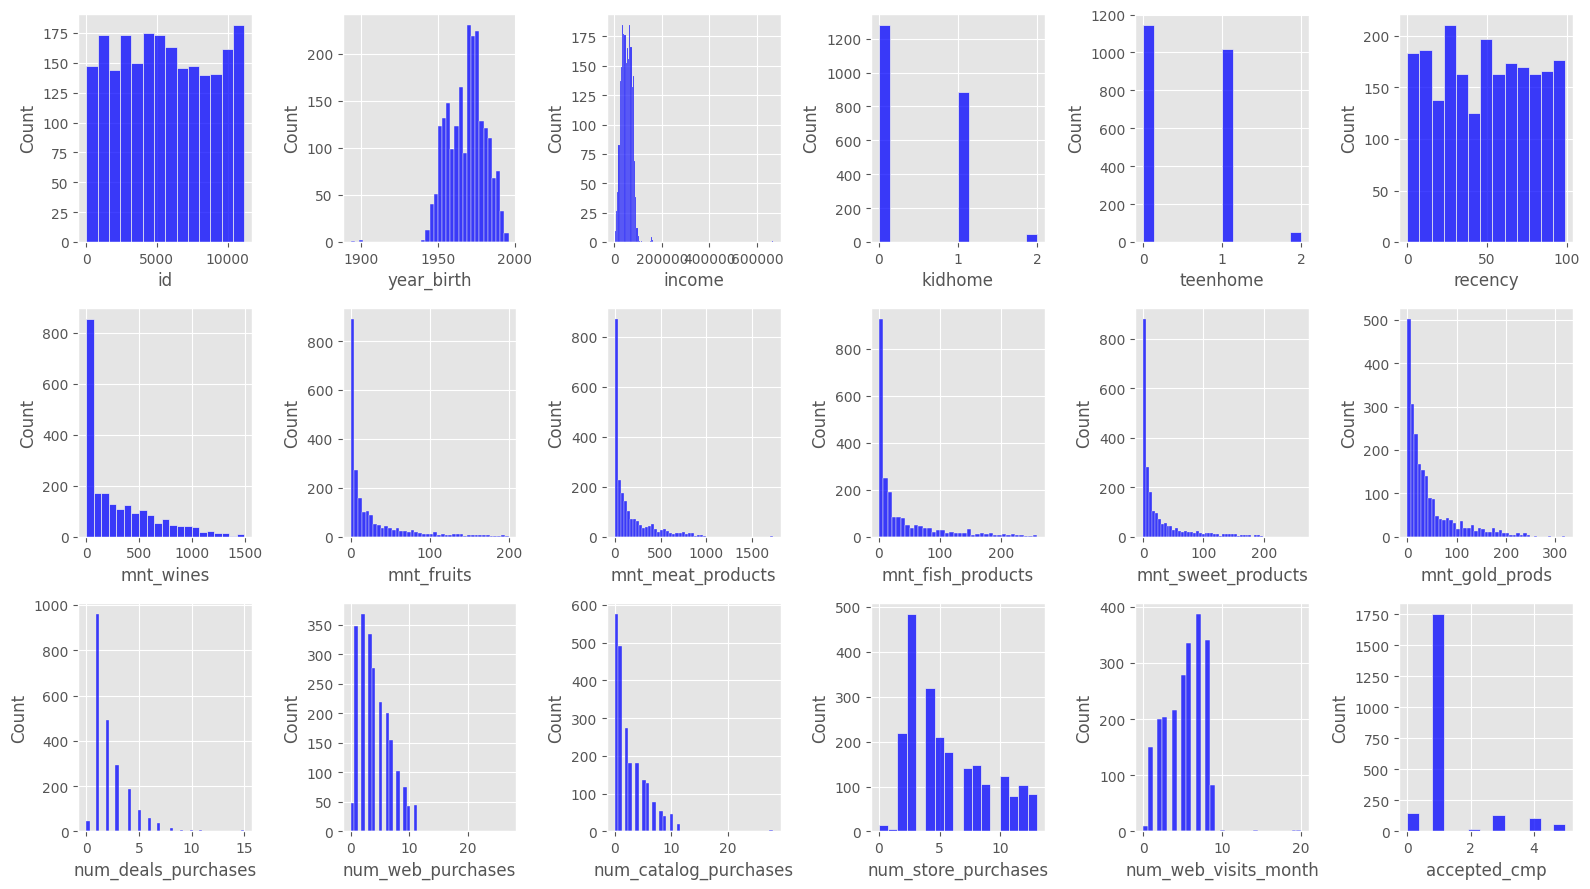

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(16, 9))
ax = ax.flatten()
num_cols = df.select_dtypes(include=np.number)

for i in range(len(ax)):
    sns.histplot(data=num_cols, x=num_cols.columns[i], ax=ax[i], color='blue')
    
plt.tight_layout()

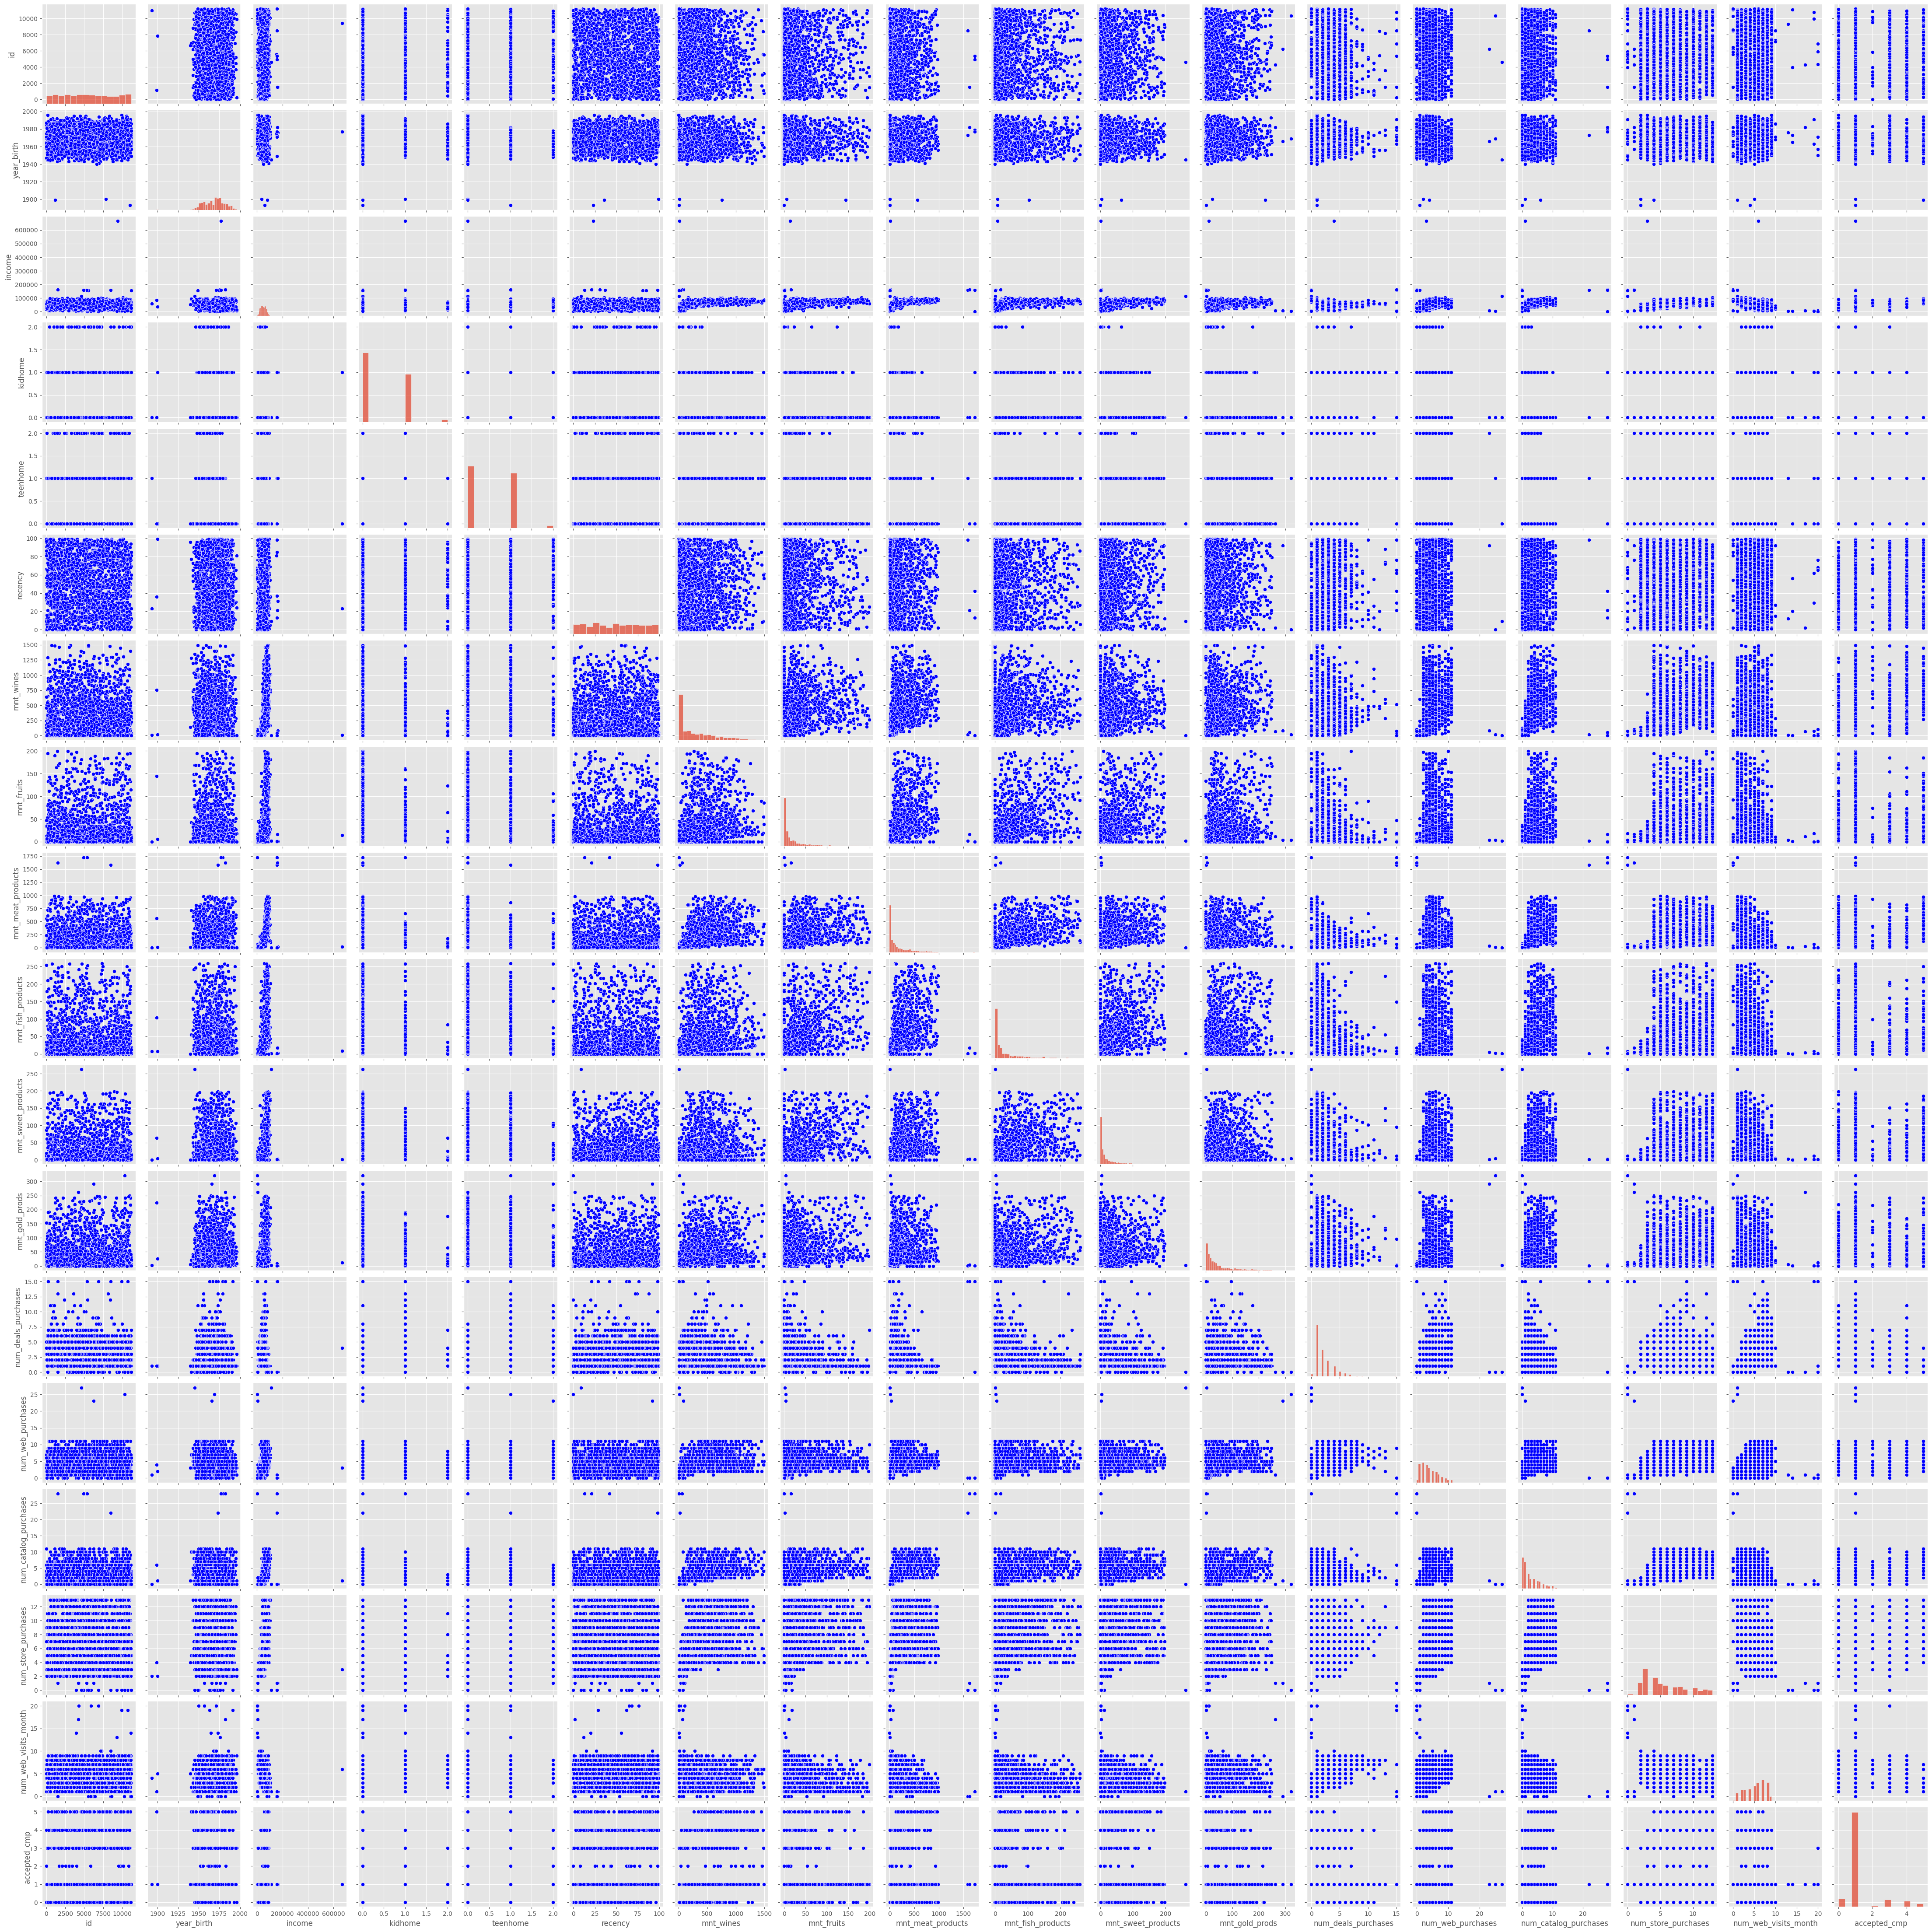

In [ ]:
_ = sns.pairplot(data=df, plot_kws={'color': 'blue'})

In this `pairplot`, we can also see that there are a few regions of the feature space that have very few values. This can make predictions a less precise if they end up in those regions of space, since only the *present* data will be used to train the models.

We can also see that there are no **clear** correlations between any of the variables. This can be good: it means that there is little redundant information in the dataset. Let's see what a correlation heatmap can show us.

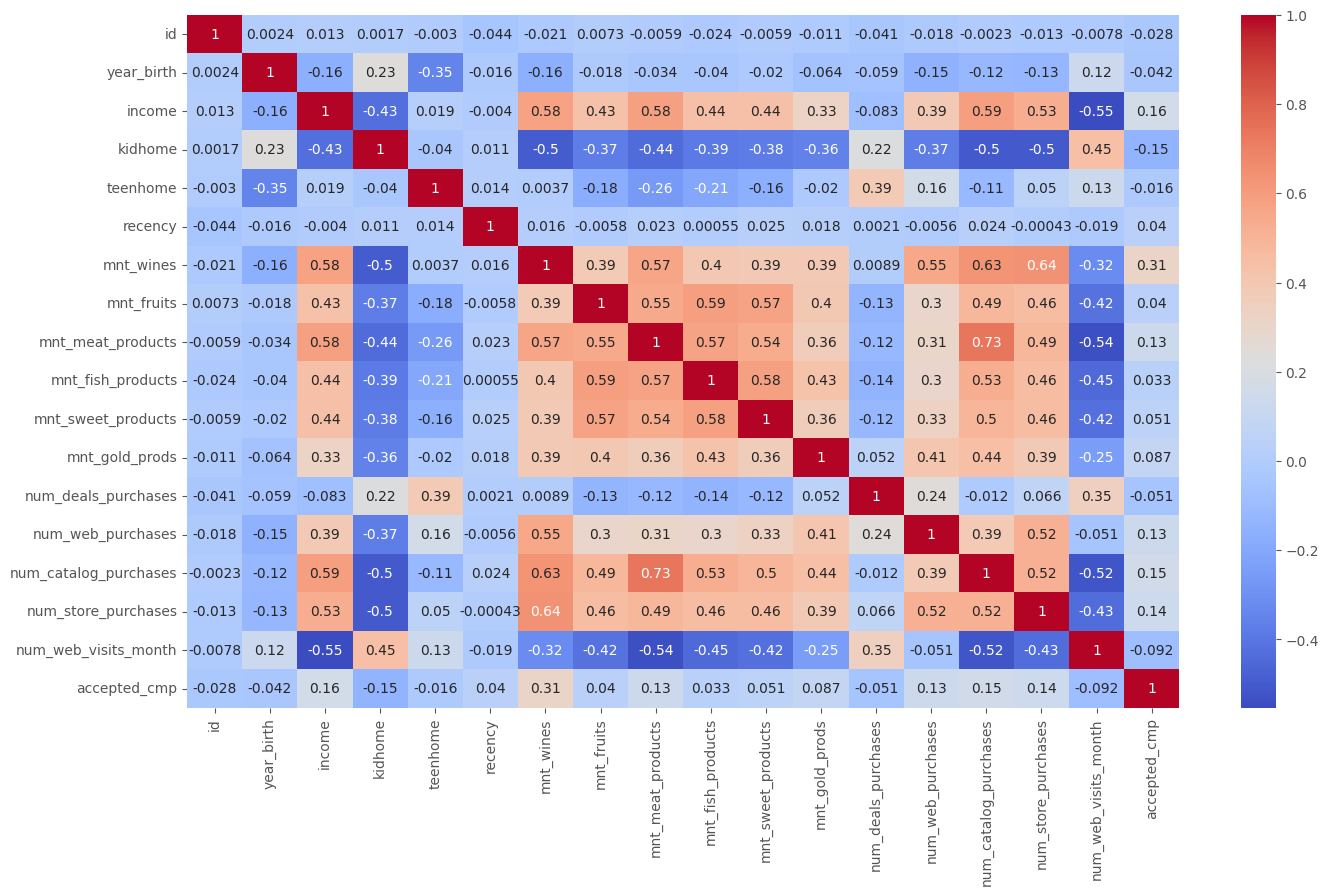

In [ ]:
plt.figure(figsize=(16, 9))
_ = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

Here, we can see that there are a few correlations, in the end!

For example, `income` is positively correlated with overall amount spent and most places of purchase. `num_web_visits_month` is negatively correlated with income (curiously!) and the amount of money spent. Also, maybe as expected, the `mnt` attributes are all positively correlated with each other.

Due to this redundant information, we can, with dimensionality reduction or feature selection procedures, reduce the dimensionality of the dataset, which, in general, makes machine learning algorithms have higher percision (see [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)).

Before moving on to a bit of data cleaning, let's take a look at what the `pairplot` looks like when we consider `marital_status` and `education`.

In [ ]:
_ = sns.pairplot(data=df, hue='marital_status')

NameError: name 'sns' is not defined

In [ ]:
_ = sns.pairplot(data=df, hue='education')

KeyboardInterrupt: 